In [1]:
import numpy as np
import scipy.io
import scipy.linalg
from scipy import signal
from scipy.linalg import fractional_matrix_power as matpow
from ssid import okid, ExtractModes
from control.matlab import * #need for "ss"
from control.matlab import impulse as _impulse
def impulse(*args, **kwds):
    a,t = _impulse(*args, **kwds)
    return a.squeeze(),t 
from matplotlib import pyplot as plt


# Test ERA on Brunton Data

In [2]:
# Load data
p = 2   # Number of outputs
q = 2   # Number of inputs
n = 100 # State dimension (Number of structural dofs x 2)
r = 10  # Reduced model order ()
dt = 1  # Timestep
bruntondata = scipy.io.loadmat("./brunton_matlab/brunton_data.mat")
yImpulseFull = bruntondata['yFull']
yImpulse = bruntondata['YY']
uRandom = bruntondata['uRandom']
yRandom = bruntondata['yRandom']
print(yImpulse.shape)

(2, 2, 52)


In [3]:
# okid.okid(yRandom,uRandom,dt=1,kmax=200,orm=52,mro=100)

Dimensions
- p = Number of outputs (measured dof or ndof)
- q = Number of inputs (ngdof)
- n = State dimension (2ndof)
- r = Reduced model order (choose)

Full model
- Dimensions of $\mathbf{A}$: n x n
- Dimensions of $\mathbf{B}$: n x q
- Dimensions of $\mathbf{C}$: p x n
- Dimensions of $\mathbf{D}$: p x q

Reduced model
- Dimensions of $\mathbf{\tilde{A}}$: r x r
- Dimensions of $\mathbf{\tilde{B}}$: r x q
- Dimensions of $\mathbf{\tilde{C}}$: p x r
- Dimensions of $\mathbf{\tilde{D}}$: p x q

In [4]:
# example state evolution with unit impulse input

from sympy.matrices import Matrix, eye
B = Matrix(np.array([['a','b','c'],['d','e','f'],['g','h','i']]))
u1 = Matrix([1,0,0])
u2 = Matrix([0,1,0])
u3 = Matrix([0,0,1])
U = eye(3)

Bu1 = Matrix(B*u1).T
Bu2 = Matrix(B*u2).T
Bu3 = Matrix(B*u3).T

display("B = ", B)
display("U = ", U)
display("u1 = ", u1)
display("u2 = ", u2)
display("u3 = ", u3)
display("[Bu1, Bu2, Bu3] = ", Bu1.T.row_join(Bu2.T.row_join(Bu3.T)))
display("BU = ", B*U)

print("this illustrates that the desired impulse response (Y) is the matrix",
      "where each column corresponds to the column vector of output response (yi)",
      "corresponding to an input column vector where the ith element is one",
      "and all others are zero (ui).")

'B = '

Matrix([
[a, b, c],
[d, e, f],
[g, h, i]])

'U = '

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

'u1 = '

Matrix([
[1],
[0],
[0]])

'u2 = '

Matrix([
[0],
[1],
[0]])

'u3 = '

Matrix([
[0],
[0],
[1]])

'[Bu1, Bu2, Bu3] = '

Matrix([
[a, b, c],
[d, e, f],
[g, h, i]])

'BU = '

Matrix([
[a, b, c],
[d, e, f],
[g, h, i]])

this illustrates that the desired impulse response (Y) is the matrix where each column corresponds to the column vector of output response (yi) corresponding to an input column vector where the ith element is one and all others are zero (ui).


In [5]:
## Compute ERA from brunton's impulse response
mco = int(np.floor((yImpulse.shape[2]-1)/2)) # m_o = m_c = (nt-1)/2
Ar,Br,Cr,Dr,HSVs = okid.era(yImpulse,mco,mco,p,q,r)
sysERA = ss(Ar,Br,Cr,Dr,dt)

# Impulse Response Experiment 1: Single Column, Different Directions

In [6]:
## Load impulse response data from hayward opensees
# exp = "changecol"
exp = "changedof"

input11  = np.loadtxt("./hwd_ops_impulse/"+exp+"/u1_u1.txt")
input21  = np.loadtxt("./hwd_ops_impulse/"+exp+"/u2_u1.txt")
output11 = np.loadtxt("./hwd_ops_impulse/"+exp+"/y1_u2.txt")
output21 = np.loadtxt("./hwd_ops_impulse/"+exp+"/y2_u2.txt")

input12  = np.loadtxt("./hwd_ops_impulse/"+exp+"/u1_u2.txt")
input22  = np.loadtxt("./hwd_ops_impulse/"+exp+"/u2_u2.txt")
output12 = np.loadtxt("./hwd_ops_impulse/"+exp+"/y1_u2.txt")
output22 = np.loadtxt("./hwd_ops_impulse/"+exp+"/y2_u2.txt")
nt = len(input11)
dt = 0.1


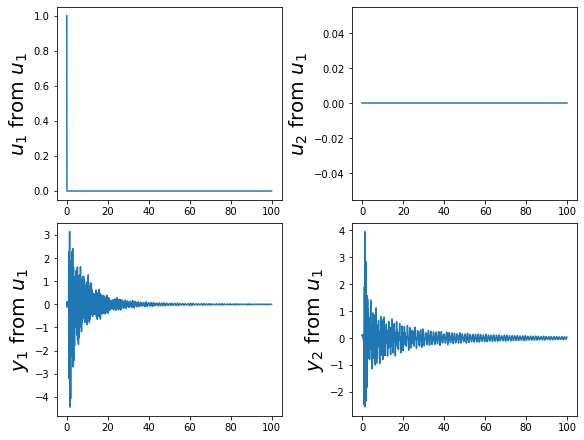

In [7]:
fig, ax = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), input11)
ax[0,0].set_ylabel(r"$u_{1}$ from $u_{1}$", fontsize=20)
ax[0,1].plot(np.arange(start=0,stop=dt*nt,step=dt), input21)
ax[0,1].set_ylabel(r"$u_{2}$ from $u_{1}$", fontsize=20)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), output11)
ax[1,0].set_ylabel(r"$y_{1}$ from $u_{1}$", fontsize=20)
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), output21)
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{1}$", fontsize=20);

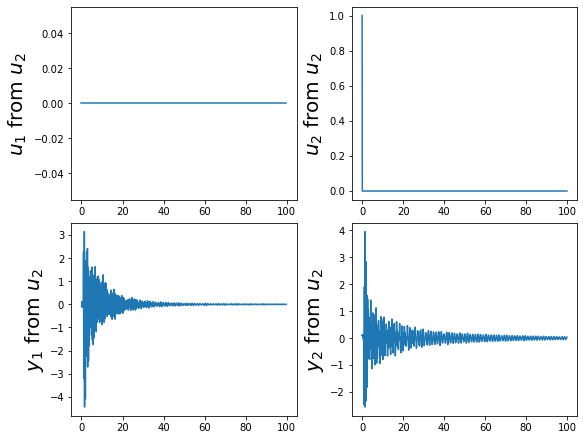

In [8]:
fig, ax = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), input12)
ax[0,0].set_ylabel(r"$u_{1}$ from $u_{2}$", fontsize=20)
ax[0,1].plot(np.arange(start=0,stop=dt*nt,step=dt), input22)
ax[0,1].set_ylabel(r"$u_{2}$ from $u_{2}$", fontsize=20)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), output12)
ax[1,0].set_ylabel(r"$y_{1}$ from $u_{2}$", fontsize=20)
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), output22)
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{2}$", fontsize=20);

In [9]:
# Construct output data array
yOpsImpulse = np.array([[output11,output12],[output21,output22]])
print(yOpsImpulse.shape)

(2, 2, 1000)


In [10]:
## Compute ERA from impulse response
r = 20
mco = int(np.floor((yOpsImpulse.shape[2]-1)/2)) # m_o = m_c = (nt-1)/2
Ar,Br,Cr,Dr,HSVs = okid.era(yOpsImpulse,mco,mco,p,q,r)
sysERA = ss(Ar,Br,Cr,Dr,dt)
sysERA2 = signal.StateSpace(Ar,Br,Cr,Dr, dt=dt)

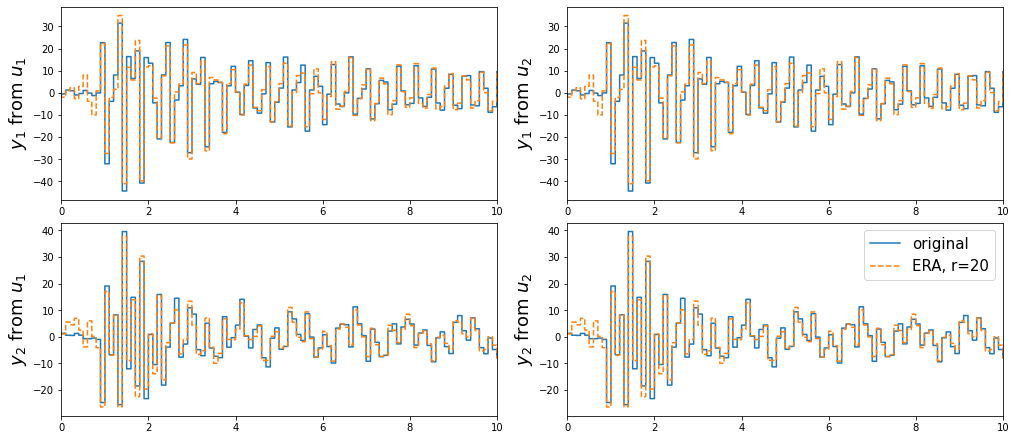

In [11]:
dt = 0.1
fig, ax = plt.subplots(2,2, figsize=(14,6), constrained_layout=True)
yERA = np.zeros((1000,p,q))
for i in range(q):
    yERA[:,:,i],times = impulse(sysERA,np.arange(start=0,stop=100,step=dt),input=i)
    # yERA[:,:,i],times = signal.impulse(sysERA2)

ax[0,0].step(times, output11/dt, label='original')
ax[0,0].step(times,yERA[:,0,0], '--')
ax[0,0].set_ylabel(r"$y_{1}$ from $u_{1}$", fontsize=18)
ax[0,1].step(times, output12/dt, label='original')
ax[0,1].step(times,yERA[:,0,1], '--')
ax[0,1].set_ylabel(r"$y_{1}$ from $u_{2}$", fontsize=18)
ax[1,0].step(times, output21/dt, label='original')
ax[1,0].step(times,yERA[:,1,0], '--')
ax[1,0].set_ylabel(r"$y_{2}$ from $u_{1}$", fontsize=18)
ax[1,1].step(times, output22/dt, label='original')
ax[1,1].step(times,yERA[:,1,1], '--', label=f'ERA, {r=}')
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{2}$", fontsize=18)
ax[1,1].legend(fontsize=15)
for axi in ax:
    for axj in axi:
        axj.set_xlim(0,10);

In [12]:
freqdmp, modeshape, _, _, _, = ExtractModes.ComposeModes(0.1, Ar, Br, Cr, Dr)
print('Periods:', [1/f for f in sorted(freqdmp[:,0])])

Periods: [1.2778208648188645, 0.9984489143403231, 0.9984489143403231, 0.9054698019860615, 0.9054698019860615, 0.46363230893932394, 0.46363230893932394, 0.38182317259466636, 0.38182317259466636, 0.3650452282814242, 0.3650452282814242, 0.3482361033585495, 0.3482361033585495, 0.222061414198129, 0.222061414198129, 0.2121379200603344, 0.2121379200603344, 0.20509178438537612]


In [13]:
modes = ExtractModes.modes(0.1, Ar, Cr)

from collections import defaultdict
ImpulsePeriods = defaultdict(dict)
ImpulsePeriods[exp] = [1/f for f in sorted([modes[str(i)]['freq'] for i in range(10)])]
print('Periods:', ImpulsePeriods[exp])

for i in range(3):
    print("Mode:", str(i))
    print("Condition Number:", modes[str(i)]['cnd'])
    print("Period:", 1/modes[str(i)]['freq'])
    print("Damping:", modes[str(i)]['damp'])
    print("Mode Shape:", modes[str(i)]['modeshape'])

Periods: [1.2778208648188645, 0.9984489143403231, 0.9054698019860615, 0.46363230893932394, 0.38182317259466636, 0.3650452282814242, 0.3482361033585495, 0.222061414198129, 0.2121379200603344, 0.20509178438537612]
Mode: 0
Condition Number: 1275551228206129.5
Period: 1.2778208648188645
Damping: 0.004374923759567694
Mode Shape: [-0.11925361+0.08155283j -0.48424277+0.30548692j]
Mode: 1
Condition Number: 927966545812935.4
Period: 0.9054698019860615
Damping: 0.004962909516797883
Mode Shape: [ 0.0034843 +0.14416257j -0.02227114+0.19393318j]
Mode: 2
Condition Number: 1333763083693066.0
Period: 0.9984489143403231
Damping: 0.006997538988229891
Mode Shape: [0.02330825-0.07726327j 0.07341383-0.12339182j]


# Impulse Response Experiment 2: 2 Columns, Same Direction

In [14]:
## Load impulse response data from hayward opensees
exp = "changecol"
# exp = "changedof"

input11  = np.loadtxt("./hwd_ops_impulse/"+exp+"/u1_u1.txt")
input21  = np.loadtxt("./hwd_ops_impulse/"+exp+"/u2_u1.txt")
output11 = np.loadtxt("./hwd_ops_impulse/"+exp+"/y1_u2.txt")
output21 = np.loadtxt("./hwd_ops_impulse/"+exp+"/y2_u2.txt")

input12  = np.loadtxt("./hwd_ops_impulse/"+exp+"/u1_u2.txt")
input22  = np.loadtxt("./hwd_ops_impulse/"+exp+"/u2_u2.txt")
output12 = np.loadtxt("./hwd_ops_impulse/"+exp+"/y1_u2.txt")
output22 = np.loadtxt("./hwd_ops_impulse/"+exp+"/y2_u2.txt")
nt = len(input11)
dt = 0.1


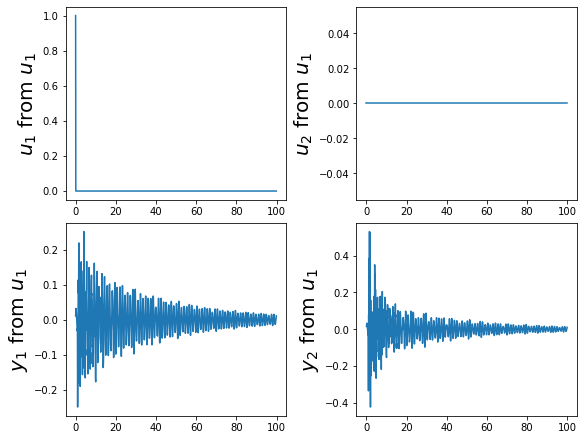

In [15]:
fig, ax = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), input11)
ax[0,0].set_ylabel(r"$u_{1}$ from $u_{1}$", fontsize=20)
ax[0,1].plot(np.arange(start=0,stop=dt*nt,step=dt), input21)
ax[0,1].set_ylabel(r"$u_{2}$ from $u_{1}$", fontsize=20)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), output11)
ax[1,0].set_ylabel(r"$y_{1}$ from $u_{1}$", fontsize=20)
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), output21)
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{1}$", fontsize=20);

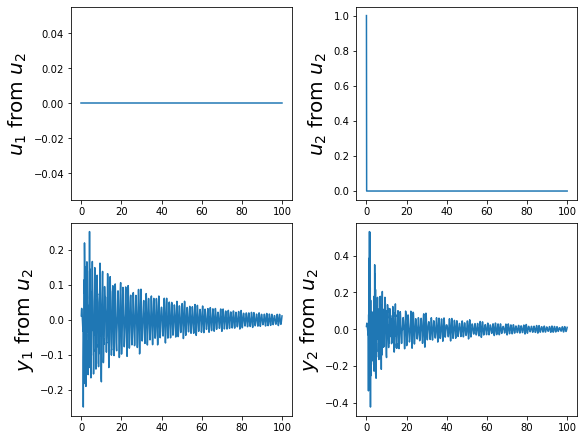

In [16]:
fig, ax = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), input12)
ax[0,0].set_ylabel(r"$u_{1}$ from $u_{2}$", fontsize=20)
ax[0,1].plot(np.arange(start=0,stop=dt*nt,step=dt), input22)
ax[0,1].set_ylabel(r"$u_{2}$ from $u_{2}$", fontsize=20)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), output12)
ax[1,0].set_ylabel(r"$y_{1}$ from $u_{2}$", fontsize=20)
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), output22)
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{2}$", fontsize=20);

In [17]:
# Construct output data array
yOpsImpulse = np.array([[output11,output12],[output21,output22]])
print(yOpsImpulse.shape)

(2, 2, 1000)


In [18]:
## Compute ERA from impulse response
r = 20
mco = int(np.floor((yOpsImpulse.shape[2]-1)/2)) # m_o = m_c = (nt-1)/2
Ar,Br,Cr,Dr,HSVs = okid.era(yOpsImpulse,mco,mco,p,q,r)
sysERA = ss(Ar,Br,Cr,Dr,dt)

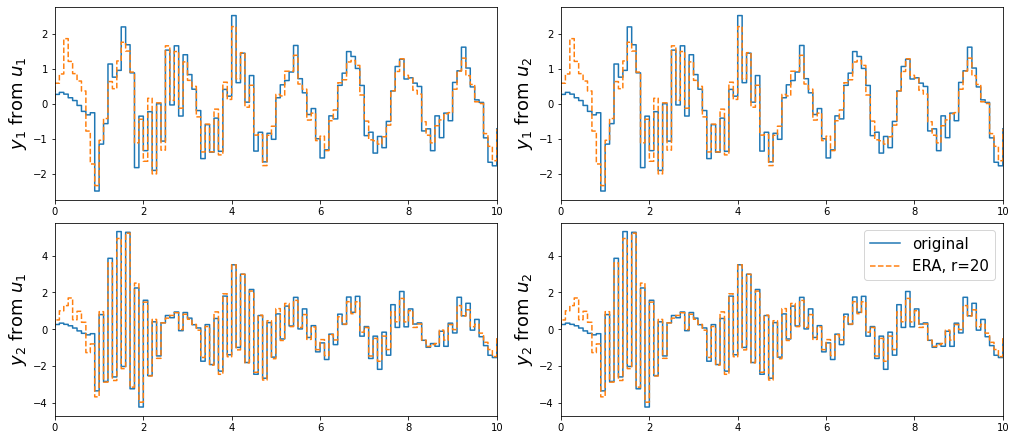

In [19]:
dt = 0.1
fig, ax = plt.subplots(2,2, figsize=(14,6), constrained_layout=True)
yERA = np.zeros((1000,p,q))
for i in range(q):
    yERA[:,:,i],times = impulse(sysERA,np.arange(start=0,stop=100,step=dt),input=i)

ax[0,0].step(times, output11/dt, label='original')
ax[0,0].step(times,yERA[:,0,0], '--')
ax[0,0].set_ylabel(r"$y_{1}$ from $u_{1}$", fontsize=18)
ax[0,1].step(times, output12/dt, label='original')
ax[0,1].step(times,yERA[:,0,1], '--')
ax[0,1].set_ylabel(r"$y_{1}$ from $u_{2}$", fontsize=18)
ax[1,0].step(times, output21/dt, label='original')
ax[1,0].step(times,yERA[:,1,0], '--')
ax[1,0].set_ylabel(r"$y_{2}$ from $u_{1}$", fontsize=18)
ax[1,1].step(times, output22/dt, label='original')
ax[1,1].step(times,yERA[:,1,1], '--', label=f'ERA, {r=}')
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{2}$", fontsize=18)
ax[1,1].legend(fontsize=15)
for axi in ax:
    for axj in axi:
        axj.set_xlim(0,10);

In [20]:
freqdmp, modeshape, _, _, _, = ExtractModes.ComposeModes(0.1, Ar, Br, Cr, Dr)
print('Periods:', [1/f for f in sorted(freqdmp[:,0])])

Periods: [1.2778544459325352, 1.2778544459325352, 1.0825629399148209, 1.0825629399148209, 0.9994920717602482, 0.9994920717602482, 0.9064499017481591, 0.9064499017481591, 0.5023509677865482, 0.5023509677865482, 0.47361298022000936, 0.21965430369407946, 0.21965430369407946, 0.21481524742475638, 0.21481524742475638, 0.2086251337172239, 0.2086251337172239, 0.20190728960835408]


In [21]:
modes = ExtractModes.modes(0.1, Ar, Cr)

ImpulsePeriods[exp] = [1/f for f in sorted([modes[str(i)]['freq'] for i in range(10)])]
print('Periods:', ImpulsePeriods[exp])

for i in range(3):
    print("Mode:", str(i))
    print("Condition Number:", modes[str(i)]['cnd'])
    print("Period:", 1/modes[str(i)]['freq'])
    print("Damping:", modes[str(i)]['damp'])
    print("Mode Shape:", modes[str(i)]['modeshape'])

Periods: [1.2778544459325352, 1.0825629399148209, 0.9994920717602482, 0.9064499017481591, 0.5023509677865482, 0.47361298022000936, 0.21965430369407946, 0.21481524742475638, 0.2086251337172239, 0.20190728960835408]
Mode: 0
Condition Number: 907390369041412.2
Period: 0.47361298022000936
Damping: 0.005395613713753367
Mode Shape: [0.04730386-0.1354354j  0.04184185-0.10533865j]
Mode: 1
Condition Number: 4438912368463300.5
Period: 0.5023509677865482
Damping: 0.006766784470425217
Mode Shape: [-0.01202497-0.08926694j -0.01445922-0.09210741j]
Mode: 2
Condition Number: 2004548821472008.2
Period: 1.2778544459325352
Damping: 0.004325819081830362
Mode Shape: [-0.14361995-0.22152429j -0.12446316-0.19463077j]


# Modal Identification from Impulse Response Experiments

C:\Users\16507\AppData\Local\Temp/ipykernel_1440/1182121749.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(nModes+1))


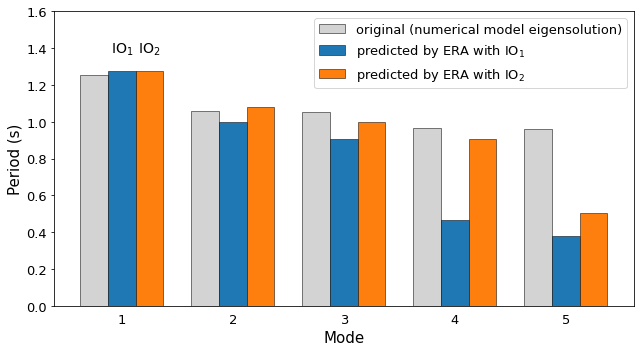

In [22]:
# nModes = len(Periods['ops'])
nModes = 5
ImpulsePeriods['ops'] = np.loadtxt("./hwd_ops_impulse/PeriodsPostG.txt")[:nModes]

fig, ax = plt.subplots(figsize=(9,5), tight_layout=True)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ind = np.arange(nModes)
width = 0.25
ax.bar(ind-width, ImpulsePeriods['ops'], width, label="original (numerical model eigensolution)", color="lightgray", edgecolor="k", linewidth=0.5)
ax.bar(ind, ImpulsePeriods['changedof'][:nModes], width, label=r"predicted by ERA with IO$_{1}$", color=colors[0], edgecolor="k", linewidth=0.5)
ax.bar(ind+width, ImpulsePeriods['changecol'][:nModes], width, label=r"predicted by ERA with IO$_{2}$", color=colors[1], edgecolor="k", linewidth=0.5)
ax.set_xticklabels(np.arange(nModes+1))
ax.set_ylim((0,1.6))
ax.set_xlabel('Mode', fontsize=15)
ax.set_ylabel('Period (s)', fontsize=15)
ax.tick_params(axis='x', labelsize=13, bottom=False)
ax.tick_params(axis='y', labelsize=13)
ax.legend(fontsize=13)
rects = ax.patches
height = rects[0].get_height()
ax.text(rects[0].get_x() + 3*width/2, height+0.1, r"IO$_{1}$", ha="center", va="bottom", fontsize=14);
ax.text(rects[0].get_x() + 5*width/2, height+0.1, r"IO$_{2}$", ha="center", va="bottom", fontsize=14);

# Real Time History Data

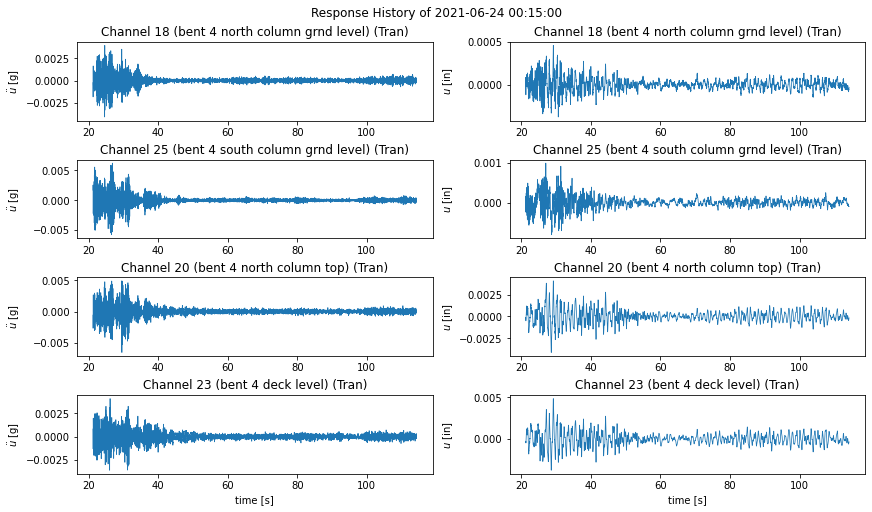

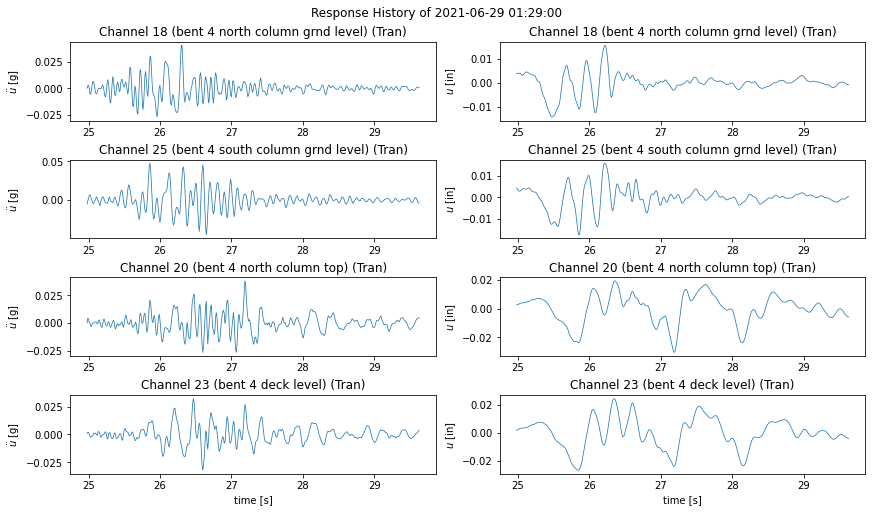

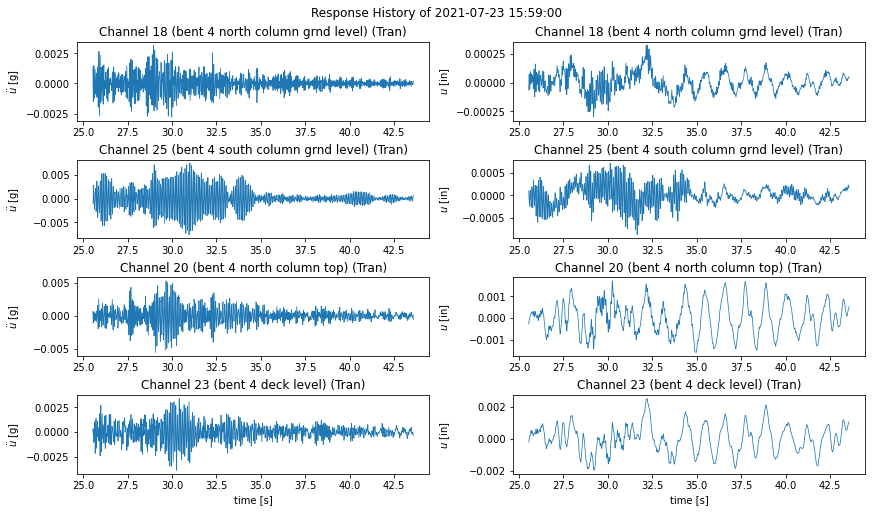

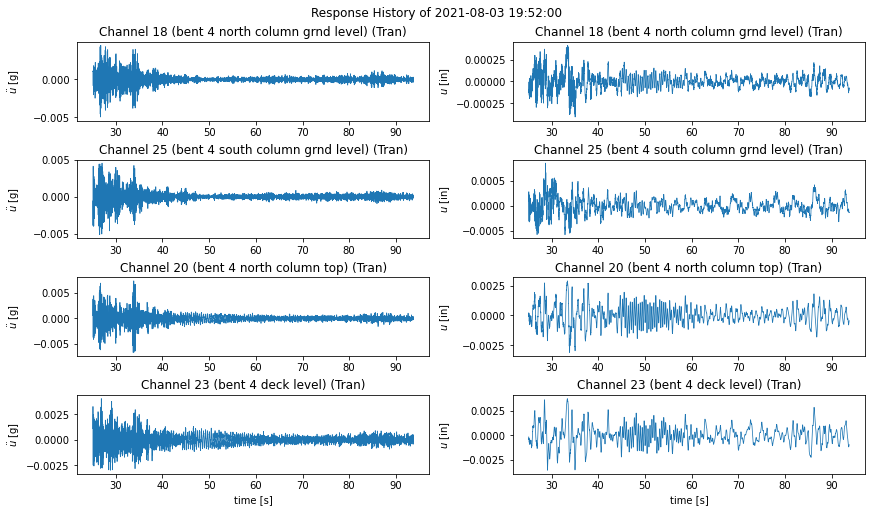

In [23]:
# See the real response data to test

import pickle
from datetime import datetime
from CE58658.utilities import husid

with open('../../CalTrans.Hayward/Studies/rawRHs.dat', 'rb') as f:
    rawRHs = pickle.load(f)

def plotSensorRH(rawRHs, event_date, channel_numbers, dt, windowed=False):   
    event = rawRHs[event_date]

    accel_unit_label = r"$\ddot{u}$ [g]"
    accel_scale = 1/980.665
    displ_unit_label = r"$u$ [in]"
    displ_scale = 1/2.54

    fig, ax = plt.subplots(len(channel_numbers), 2, figsize=(12,1.75*len(channel_numbers)), constrained_layout=True)
    if dt is not None:
        x_units = "s"
    else:
        dt = 1.0
        x_units = "timestep"
    sensorRH0 = event['24']['accel']*accel_scale
    times = dt*np.arange(len(sensorRH0))
    if windowed:
        window = husid(sensorRH0, False, dt, lb=0.025, ub=0.975)
        times = times[window[0]:window[1]]
    else:
        window = [0,len(sensorRH0)]
        fig, ax = plt.subplots(1,2,figsize=(15,3))

    accels = defaultdict(dict)
    for i,nm in enumerate(channel_numbers):
        accel_series = event[nm]['accel'][window[0]:window[1]]*accel_scale
        accels[nm] = event[nm]['accel']*accel_scale
        displ_series = event[nm]['displ'][window[0]:window[1]]*displ_scale
        direction = event[nm]['direction']
        channel_name = event[nm]['channel_name']
        ax[i,0].plot(times, accel_series, linewidth=0.75)
        ax[i,0].set_ylabel(f"{accel_unit_label}")
        ax[i,0].set_title(f"Channel {nm} ({channel_name}) ({direction})")
        ax[i,1].plot(times, displ_series, linewidth=0.75)
        ax[i,1].set_ylabel(f"{displ_unit_label}")
        ax[i,1].set_title(f"Channel {nm} ({channel_name}) ({direction})")
    ax[-1,0].set_xlabel(f"time [{x_units}]")
    ax[-1,1].set_xlabel(f"time [{x_units}]")
    fig.suptitle(f"Response History of {datetime.strptime(event_date, '%Y-%m-%dT%H:%M:%S')}")
    fig.align_labels()
    plt.show()
    return accels

event_dates = ['2021-06-24T00:15:00', '2021-06-29T01:29:00', '2021-07-23T15:59:00', '2021-08-03T19:52:00']
accelRHs = defaultdict(dict)
for event_date in event_dates:
    accelRHs[event_date] = plotSensorRH(rawRHs, event_date, ["18", "25", "20", "23"], 0.01, windowed=True)

# TH Experiment: Event 1 (6/24)

In [24]:
## Load time history response data
exp = "exp1" # 6/24
i = 0
print(event_dates[i])

cgs_input   = accelRHs[event_dates[i]]['18']
window = husid(cgs_input, False, dt, lb=0.03, ub=0.9)
cgs_input = cgs_input[window[0]:window[1]]
ops_input   = np.loadtxt("./hwd_ops_th/"+exp+"/u.txt")[window[0]:window[1]]/386.088583
cgs_output1 = accelRHs[event_dates[i]]['20'][window[0]:window[1]]
ops_output1 = np.loadtxt("./hwd_ops_th/"+exp+"/y1.txt")[window[0]:window[1]]/386.088583
cgs_output2 = accelRHs[event_dates[i]]['23'][window[0]:window[1]]
ops_output2 = np.loadtxt("./hwd_ops_th/"+exp+"/y2.txt")[window[0]:window[1]]/386.088583

nt = len(cgs_input)
print(nt)
dt = 0.01

2021-06-24T00:15:00
5667


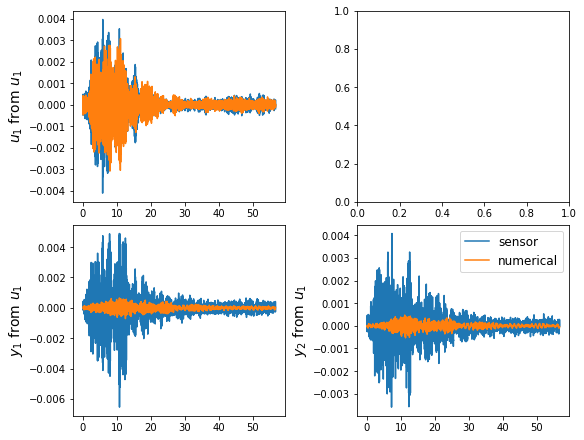

In [25]:
fig, ax = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_input)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_input)
ax[0,0].set_ylabel(r"$u_{1}$ from $u_{1}$", fontsize=14)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_output1)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_output1)
ax[1,0].set_ylabel(r"$y_{1}$ from $u_{1}$", fontsize=14)
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_output2, label='sensor')
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_output2, label='numerical')
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{1}$", fontsize=14)
ax[1,1].legend(fontsize=12);

In [26]:
# Construct output data array
yOpsTH = np.array([[ops_output1],[ops_output2]])
yCGSTH = np.array([[cgs_output1],[cgs_output2]])
print(yOpsTH.shape)
print(yCGSTH.shape)

(2, 1, 5667)
(2, 1, 5667)


In [27]:
StateSpaces = defaultdict(dict)

In [28]:
## Compute ERA from TH response
r = 20
p = 2
q = 1
print((p,q))
mco = int(np.floor((yOpsTH.shape[2]-1)/2)) # m_o = m_c = (nt-1)/2
print(mco)
# mco=1000
StateSpaces[exp]['ops'] = okid.era(yOpsTH,mco,mco,p,q,r)
StateSpaces[exp]['cgs'] = okid.era(yCGSTH,mco,mco,p,q,r)

(2, 1)
2833


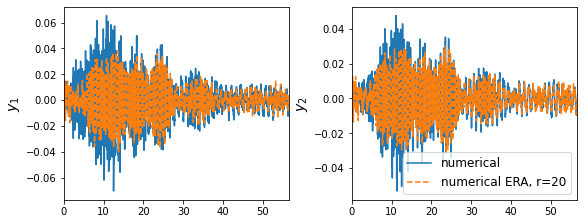

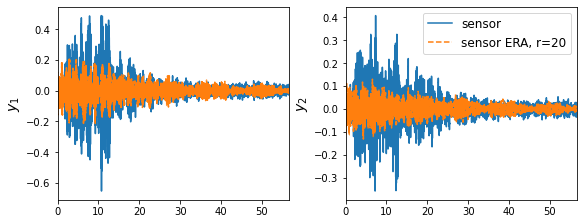

In [29]:
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['ops']
sysERA_ops = ss(Ar,Br,Cr,Dr,dt)
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['cgs']
sysERA_cgs = ss(Ar,Br,Cr,Dr,dt)

yERA_ops = np.zeros((nt,p,q))
yERA_cgs = np.zeros((nt,p,q))
for i in range(q):
    yERA_ops[:,:,i],times = impulse(sysERA_ops,np.arange(start=0,stop=nt*dt,step=dt),input=i)
    yERA_cgs[:,:,i],times = impulse(sysERA_cgs,np.arange(start=0,stop=nt*dt,step=dt),input=i)

fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
ax[0].step(times, ops_output1/dt)
ax[0].step(times, yERA_ops[:,0,0], '--')
ax[0].set_ylabel(r"$y_{1}$", fontsize=14)
ax[1].step(times, ops_output2/dt, label='numerical')
ax[1].step(times, yERA_ops[:,1,0], '--', label=f'numerical ERA, {r=}')
ax[1].set_ylabel(r"$y_{2}$", fontsize=14)
ax[1].legend(fontsize=12)
for axi in ax:
    axi.set_xlim(0,nt*dt);

fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
ax[0].step(times, cgs_output1/dt)
ax[0].step(times, yERA_cgs[:,0,0], '--')
ax[0].set_ylabel(r"$y_{1}$", fontsize=14)
ax[1].step(times, cgs_output2/dt, label='sensor')
ax[1].step(times, yERA_cgs[:,1,0], '--', label=f'sensor ERA, {r=}')
ax[1].set_ylabel(r"$y_{2}$", fontsize=14)
ax[1].legend(fontsize=12)
for axi in ax:
    axi.set_xlim(0,nt*dt);

In [30]:
Periods = defaultdict(dict)

In [31]:
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['ops']
modes_ops = ExtractModes.modes(dt, Ar, Cr)
Periods[exp]['ops'] = [1/f for f in sorted([modes_ops[str(i)]['freq'] for i in range(10)])]

print([d for d in sorted([modes_ops[str(i)]['damp'] for i in range(10)])])
print('Opensees Periods:', Periods[exp]['ops'])
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['cgs']
modes_cgs = ExtractModes.modes(dt, Ar, Cr)
Periods[exp]['cgs'] = [1/f for f in sorted([modes_cgs[str(i)]['freq'] for i in range(10)])]
print('CGS Periods:', Periods[exp]['cgs'])

[-0.0023876570755305814, -0.0001822986038222685, 0.00033617029136768795, 0.0007417474261338301, 0.0009061578051477496, 0.0011860782585512446, 0.0017763201167326434, 0.002983291938597127, 0.0031776774208850662, 0.003840085263999432]
Opensees Periods: [1.2481554093262843, 1.0550882423665422, 0.552491772024988, 0.4318763936294646, 0.4246864446049445, 0.4185934447098686, 0.413735478228441, 0.40169019267595346, 0.3975431185996642, 0.09604416022052512]
CGS Periods: [0.4146603551782005, 0.39916335935353364, 0.35020240471659003, 0.08968044869311832, 0.08617197319302772, 0.08496029785852438, 0.08440832344828207, 0.08343482041465675, 0.0814671697533183, 0.07768984847237259]


# TH Experiment: Event 2 (6/29)

In [32]:
## Load time history response data
exp = "exp2" # 6/29
i = 1
print(event_dates[i])

cgs_input   = accelRHs[event_dates[i]]['18']
window = husid(cgs_input, False, dt, lb=0.02, ub=0.995)
cgs_input = cgs_input[window[0]:window[1]]
ops_input   = np.loadtxt("./hwd_ops_th/"+exp+"/u.txt")[window[0]:window[1]]/386.088583
cgs_output1 = accelRHs[event_dates[i]]['20'][window[0]:window[1]]
ops_output1 = np.loadtxt("./hwd_ops_th/"+exp+"/y1.txt")[window[0]:window[1]]/386.088583
cgs_output2 = accelRHs[event_dates[i]]['23'][window[0]:window[1]]
ops_output2 = np.loadtxt("./hwd_ops_th/"+exp+"/y2.txt")[window[0]:window[1]]/386.088583

nt = len(cgs_input)
dt = 0.01

2021-06-29T01:29:00


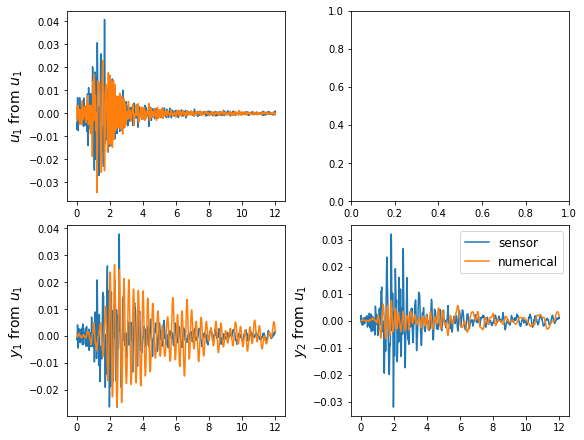

In [33]:
fig, ax = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_input)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_input)
ax[0,0].set_ylabel(r"$u_{1}$ from $u_{1}$", fontsize=14)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_output1)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_output1)
ax[1,0].set_ylabel(r"$y_{1}$ from $u_{1}$", fontsize=14)
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_output2, label='sensor')
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_output2, label='numerical')
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{1}$", fontsize=14)
ax[1,1].legend(fontsize=12);

In [34]:
# Construct output data array
yOpsTH = np.array([[ops_output1],[ops_output2]])
yCGSTH = np.array([[cgs_output1],[cgs_output2]])
print(yOpsTH.shape)
print(yCGSTH.shape)

(2, 1, 1202)
(2, 1, 1202)


In [35]:
## Compute ERA from TH response
r = 20
p = 2
q = 1
print((p,q))
mco = int(np.floor((yOpsTH.shape[2]-1)/2)) # m_o = m_c = (nt-1)/2
StateSpaces[exp]['ops'] = okid.era(yOpsTH,mco,mco,p,q,r)
StateSpaces[exp]['cgs'] = okid.era(yCGSTH,mco,mco,p,q,r)

(2, 1)


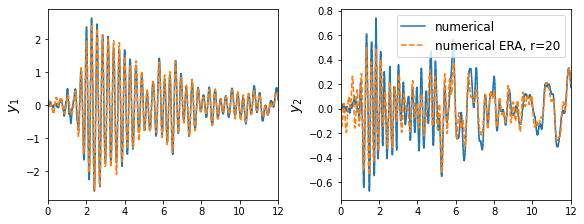

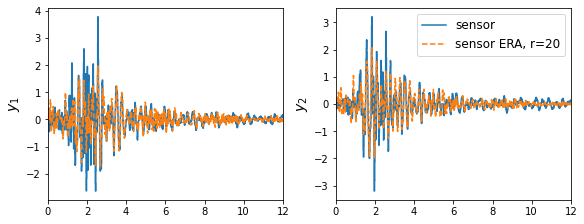

In [36]:
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['ops']
sysERA_ops = ss(Ar,Br,Cr,Dr,dt)
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['cgs']
sysERA_cgs = ss(Ar,Br,Cr,Dr,dt)

yERA_ops = np.zeros((nt,p,q))
yERA_cgs = np.zeros((nt,p,q))
for i in range(q):
    yERA_ops[:,:,i],times = impulse(sysERA_ops,np.arange(start=0,stop=nt*dt,step=dt),input=i)
    yERA_cgs[:,:,i],times = impulse(sysERA_cgs,np.arange(start=0,stop=nt*dt,step=dt),input=i)

fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
ax[0].step(times, ops_output1/dt)
ax[0].step(times, yERA_ops[:,0,0], '--')
ax[0].set_ylabel(r"$y_{1}$", fontsize=14)
ax[1].step(times, ops_output2/dt, label='numerical')
ax[1].step(times, yERA_ops[:,1,0], '--', label=f'numerical ERA, {r=}')
ax[1].set_ylabel(r"$y_{2}$", fontsize=14)
ax[1].legend(fontsize=12)
for axi in ax:
    axi.set_xlim(0,nt*dt);

fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
ax[0].step(times, cgs_output1/dt)
ax[0].step(times, yERA_cgs[:,0,0], '--')
ax[0].set_ylabel(r"$y_{1}$", fontsize=14)
ax[1].step(times, cgs_output2/dt, label='sensor')
ax[1].step(times, yERA_cgs[:,1,0], '--', label=f'sensor ERA, {r=}')
ax[1].set_ylabel(r"$y_{2}$", fontsize=14)
ax[1].legend(fontsize=12)

for axi in ax:
    axi.set_xlim(0,nt*dt);

In [37]:
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['ops']
modes_ops = ExtractModes.modes(dt, Ar, Cr)
Periods[exp]['ops'] = [1/f for f in sorted([modes_ops[str(i)]['freq'] for i in range(10)])]
print([d for d in sorted([modes_ops[str(i)]['damp'] for i in range(10)])])
print('Opensees Periods:', Periods[exp]['ops'])
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['cgs']
modes_cgs = ExtractModes.modes(dt, Ar, Cr)
Periods[exp]['cgs'] = [1/f for f in sorted([modes_cgs[str(i)]['freq'] for i in range(10)])]
print('CGS Periods:', Periods[exp]['cgs'])

[-0.012511646225878999, -0.00464069239960909, -0.0010208592711357708, 0.002636870259891144, 0.006949975243823149, 0.007884751627020467, 0.01150094445407634, 0.013370274266250788, 0.025442498800678046, 0.03442821295395864]
Opensees Periods: [1.2363381260130966, 1.013169879465669, 0.896841441390807, 0.43015504592147336, 0.4083304634266055, 0.2936717092137122, 0.29087061621919386, 0.2710065364424057, 0.2560979135794539, 0.23849512276884424]
CGS Periods: [0.3291588815714096, 0.30520556773715096, 0.28327931312745974, 0.24547054368839652, 0.2350599608027736, 0.1691541852982209, 0.14007451410985258, 0.0926978584506251, 0.08029459616346572, 0.07842964832333561]


# TH Experiment: Event 3 (7/23)

In [38]:
## Load time history response data
exp = "exp3" # 7/23
i = 2
print(event_dates[i])

cgs_input   = accelRHs[event_dates[i]]['18']
window = husid(cgs_input, False, dt, lb=0.1, ub=0.9)
cgs_input = cgs_input[window[0]:window[1]]
ops_input   = np.loadtxt("./hwd_ops_th/"+exp+"/u.txt")[window[0]:window[1]]/386.088583
cgs_output1 = accelRHs[event_dates[i]]['20'][window[0]:window[1]]
ops_output1 = np.loadtxt("./hwd_ops_th/"+exp+"/y1.txt")[window[0]:window[1]]/386.088583
cgs_output2 = accelRHs[event_dates[i]]['23'][window[0]:window[1]]
ops_output2 = np.loadtxt("./hwd_ops_th/"+exp+"/y2.txt")[window[0]:window[1]]/386.088583

nt = len(cgs_input)
dt = 0.01

2021-07-23T15:59:00


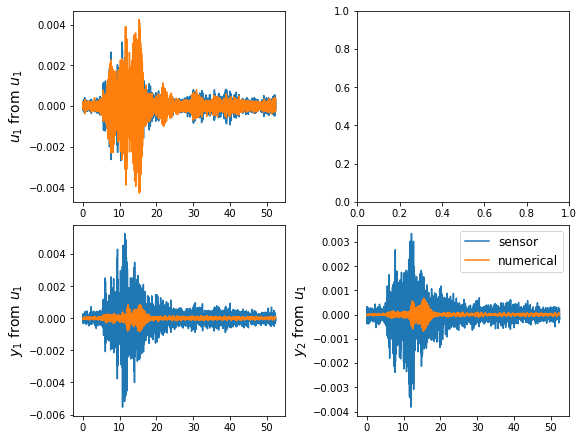

In [39]:
fig, ax = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_input)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_input)
ax[0,0].set_ylabel(r"$u_{1}$ from $u_{1}$", fontsize=14)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_output1)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_output1)
ax[1,0].set_ylabel(r"$y_{1}$ from $u_{1}$", fontsize=14)
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_output2, label='sensor')
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_output2, label='numerical')
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{1}$", fontsize=14)
ax[1,1].legend(fontsize=12);

In [40]:
# Construct output data array
yOpsTH = np.array([[ops_output1],[ops_output2]])
yCGSTH = np.array([[cgs_output1],[cgs_output2]])
print(yOpsTH.shape)
print(yCGSTH.shape)

(2, 1, 5245)
(2, 1, 5245)


In [41]:
## Compute ERA from TH response
r = 20
p = 2
q = 1
print((p,q))
mco = int(np.floor((yOpsTH.shape[2]-1)/2)) # m_o = m_c = (nt-1)/2
StateSpaces[exp]['ops'] = okid.era(yOpsTH,mco,mco,p,q,r)
StateSpaces[exp]['cgs'] = okid.era(yCGSTH,mco,mco,p,q,r)

(2, 1)


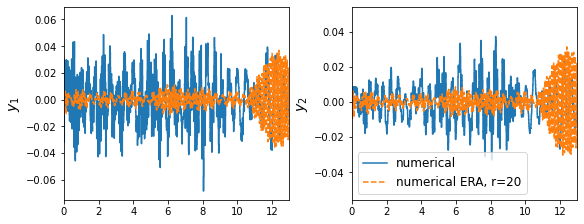

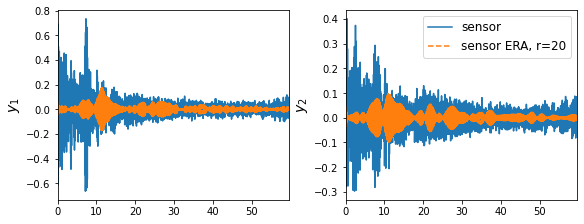

In [53]:
Ar,Br,Cr,Dr,HSVs = StateSpaces['exp3']['ops']
sysERA_ops = ss(Ar,Br,Cr,Dr,dt)
Ar,Br,Cr,Dr,HSVs = StateSpaces['exp3']['cgs']
sysERA_cgs = ss(Ar,Br,Cr,Dr,dt)
Ar1,Br1,Cr1,Dr1,HSVs1 = StateSpaces['exp2']['ops']
sysERA_ops1 = ss(Ar1,Br1,Cr1,Dr1,dt)

yERA_ops = np.zeros((nt,p,q))
yERA_ops1 = np.zeros((nt,p,q))
yERA_cgs = np.zeros((nt,p,q))
for i in range(q):
    yERA_cgs[:,:,i],times = impulse(sysERA_cgs,np.arange(start=0,stop=nt*dt,step=dt),input=i)
    yERA_ops[:,:,i],times = impulse(sysERA_ops,np.arange(start=0,stop=nt*dt,step=dt),input=i)
    yERA_ops1[:,:,i],times = impulse(sysERA_ops1,np.arange(start=0,stop=nt*dt,step=dt),input=i)

fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
ax[0].step(times, ops_output1/dt)
ax[0].step(times, yERA_ops[:,0,0], '--')
# ax[0].step(times, yERA_ops1[:,0,0], '--')
ax[0].set_ylabel(r"$y_{1}$", fontsize=14)
ax[1].step(times, ops_output2/dt, label='numerical')
ax[1].step(times, yERA_ops[:,1,0], '--', label=f'numerical ERA, {r=}')
# ax[1].step(times, yERA_ops1[:,1,0], '--', label=f'numerical ERA, {r=}')
ax[1].set_ylabel(r"$y_{2}$", fontsize=14)
ax[1].legend(fontsize=12)
for axi in ax:
    axi.set_xlim(0,13)
    # axi.set_ylim(-1,1)
    # axi.set_xlim(0,nt*dt);

fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
ax[0].step(times, cgs_output1/dt)
ax[0].step(times, yERA_cgs[:,0,0], '--')
ax[0].set_ylabel(r"$y_{1}$", fontsize=14)
ax[1].step(times, cgs_output2/dt, label='sensor')
ax[1].step(times, yERA_cgs[:,1,0], '--', label=f'sensor ERA, {r=}')
ax[1].set_ylabel(r"$y_{2}$", fontsize=14)
ax[1].legend(fontsize=12)

for axi in ax:
    axi.set_xlim(0,nt*dt);

In [43]:
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['ops']
modes_ops = ExtractModes.modes(dt, Ar, Cr)
Periods[exp]['ops'] = [1/f for f in sorted([modes_ops[str(i)]['freq'] for i in range(10)])]
print('Opensees Periods:', Periods[exp]['ops'])
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['cgs']
modes_cgs = ExtractModes.modes(dt, Ar, Cr)
Periods[exp]['cgs'] = [1/f for f in sorted([modes_cgs[str(i)]['freq'] for i in range(10)])]
print('CGS Periods:', Periods[exp]['cgs'])

Opensees Periods: [0.40253776397011726, 0.09892708112100794, 0.0983962122186279, 0.09787385924130021, 0.09736731718213594, 0.0967812717476938, 0.09629297486165678, 0.09580615207400163, 0.0952636716585211, 0.09474370075056236]
CGS Periods: [0.09686825308749233, 0.0946290596267232, 0.09396947140561121, 0.09329241006712137, 0.09266249992318581, 0.09212124490907017, 0.09159162970544557, 0.0907114918070751, 0.09009177938061128, 0.08712036727929344]


# TH Experiment: Event 4 (8/3)

In [44]:
## Load time history response data
exp = "exp4" # 8/3
i = 3
print(event_dates[i])

cgs_input   = accelRHs[event_dates[i]]['18']
window = husid(cgs_input, False, dt, lb=0.1, ub=0.9)
cgs_input = cgs_input[window[0]:window[1]]
ops_input   = np.loadtxt("./hwd_ops_th/"+exp+"/u.txt")[window[0]:window[1]]/386.088583
cgs_output1 = accelRHs[event_dates[i]]['20'][window[0]:window[1]]
ops_output1 = np.loadtxt("./hwd_ops_th/"+exp+"/y1.txt")[window[0]:window[1]]/386.088583
cgs_output2 = accelRHs[event_dates[i]]['23'][window[0]:window[1]]
ops_output2 = np.loadtxt("./hwd_ops_th/"+exp+"/y2.txt")[window[0]:window[1]]/386.088583

nt = len(cgs_input)
dt = 0.01

2021-08-03T19:52:00


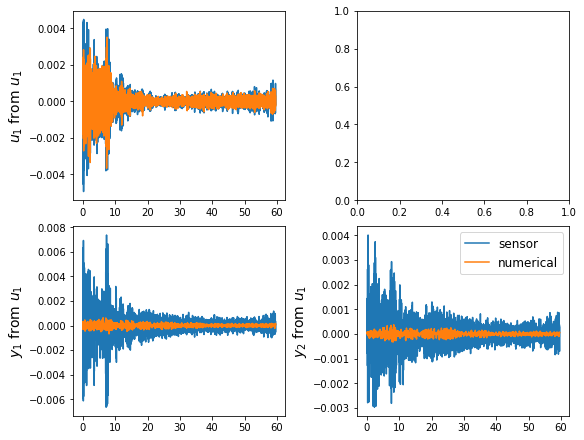

In [45]:
fig, ax = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_input)
ax[0,0].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_input)
ax[0,0].set_ylabel(r"$u_{1}$ from $u_{1}$", fontsize=14)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_output1)
ax[1,0].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_output1)
ax[1,0].set_ylabel(r"$y_{1}$ from $u_{1}$", fontsize=14)
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), cgs_output2, label='sensor')
ax[1,1].plot(np.arange(start=0,stop=dt*nt,step=dt), ops_output2, label='numerical')
ax[1,1].set_ylabel(r"$y_{2}$ from $u_{1}$", fontsize=14)
ax[1,1].legend(fontsize=12);

In [46]:
# Construct output data array
yOpsTH = np.array([[ops_output1],[ops_output2]])
yCGSTH = np.array([[cgs_output1],[cgs_output2]])
print(yOpsTH.shape)
print(yCGSTH.shape)

(2, 1, 5962)
(2, 1, 5962)


In [47]:
## Compute ERA from TH response
r = 20
p = 2
q = 1
print((p,q))
mco = int(np.floor((yOpsTH.shape[2]-1)/2)) # m_o = m_c = (nt-1)/2
StateSpaces[exp]['ops'] = okid.era(yOpsTH,mco,mco,p,q,r)
StateSpaces[exp]['cgs'] = okid.era(yCGSTH,mco,mco,p,q,r)

(2, 1)


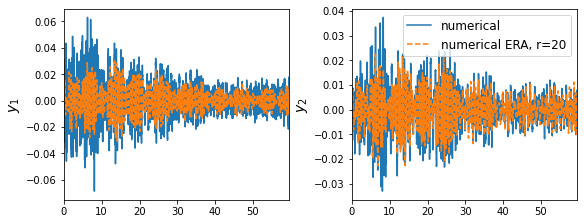

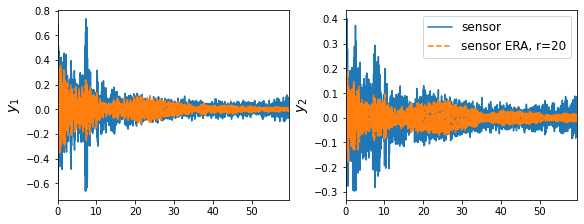

In [48]:
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['ops']
sysERA_ops = ss(Ar,Br,Cr,Dr,dt)
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['cgs']
sysERA_cgs = ss(Ar,Br,Cr,Dr,dt)

Ar,Br,Cr,Dr,HSVs = StateSpaces['exp4']['ops']
sysERA_ops = ss(Ar,Br,Cr,Dr,dt)
Ar,Br,Cr,Dr,HSVs = StateSpaces['exp4']['cgs']
sysERA_cgs = ss(Ar,Br,Cr,Dr,dt)
Ar1,Br1,Cr1,Dr1,HSVs1 = StateSpaces['exp2']['ops']
sysERA_ops1 = ss(Ar1,Br1,Cr1,Dr1,dt)


# yERA_ops = np.zeros((nt,p,q))
# yERA_cgs = np.zeros((nt,p,q))
# for i in range(q):
#     yERA_ops[:,:,i],times = impulse(sysERA_ops,np.arange(start=0,stop=nt*dt,step=dt),input=i)
#     yERA_cgs[:,:,i],times = impulse(sysERA_cgs,np.arange(start=0,stop=nt*dt,step=dt),input=i)

# fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
# ax[0].step(times, ops_output1/dt)
# ax[0].step(times, yERA_ops[:,0,0], '--')
# ax[0].set_ylabel(r"$y_{1}$", fontsize=14)
# ax[1].step(times, ops_output2/dt, label='numerical')
# ax[1].step(times, yERA_ops[:,1,0], '--', label=f'numerical ERA, {r=}')

yERA_ops = np.zeros((nt,p,q))
yERA_ops1 = np.zeros((nt,p,q))
yERA_cgs = np.zeros((nt,p,q))
for i in range(q):
    yERA_cgs[:,:,i],times = impulse(sysERA_cgs,np.arange(start=0,stop=nt*dt,step=dt),input=i)
    yERA_ops[:,:,i],times = impulse(sysERA_ops,np.arange(start=0,stop=nt*dt,step=dt),input=i)
    # yERA_ops1[:,:,i],times = impulse(sysERA_ops1,np.arange(start=0,stop=nt*dt,step=dt),input=i)

fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
ax[0].step(times, ops_output1/dt)
ax[0].step(times, yERA_ops[:,0,0], '--')
# ax[0].step(times, yERA_ops1[:,0,0], '--')
ax[0].set_ylabel(r"$y_{1}$", fontsize=14)
ax[1].step(times, ops_output2/dt, label='numerical')
ax[1].step(times, yERA_ops[:,1,0], '--', label=f'numerical ERA, {r=}')
# ax[1].step(times, yERA_ops1[:,1,0], '--', label=f'numerical ERA, {r=}')
ax[1].set_ylabel(r"$y_{2}$", fontsize=14)
ax[1].legend(fontsize=12)
for axi in ax:
    axi.set_xlim(0,nt*dt);

fig, ax = plt.subplots(1,2, figsize=(8,3), constrained_layout=True)
ax[0].step(times, cgs_output1/dt)
ax[0].step(times, yERA_cgs[:,0,0], '--')
ax[0].set_ylabel(r"$y_{1}$", fontsize=14)
ax[1].step(times, cgs_output2/dt, label='sensor')
ax[1].step(times, yERA_cgs[:,1,0], '--', label=f'sensor ERA, {r=}')
ax[1].set_ylabel(r"$y_{2}$", fontsize=14)
ax[1].legend(fontsize=12)

for axi in ax:
    axi.set_xlim(0,nt*dt);

In [49]:
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['ops']
modes_ops = ExtractModes.modes(dt, Ar, Cr)
Periods[exp]['ops'] = [1/f for f in sorted([modes_ops[str(i)]['freq'] for i in range(10)])]
print('Opensees Periods:', Periods[exp]['ops'])
Ar,Br,Cr,Dr,HSVs = StateSpaces[exp]['cgs']
modes_cgs = ExtractModes.modes(dt, Ar, Cr)
Periods[exp]['cgs'] = [1/f for f in sorted([modes_cgs[str(i)]['freq'] for i in range(10)])]
print('CGS Periods:', Periods[exp]['cgs'])

Opensees Periods: [1.2082809787484534, 1.0520485067463026, 0.573919096435991, 0.5468537400711042, 0.44264220999059967, 0.432479020820216, 0.4268872518047516, 0.42030352334190113, 0.41561813101929396, 0.40170147235159803]
CGS Periods: [0.42687168266005415, 0.42095036175887446, 0.41723244055302466, 0.08501476457023079, 0.08454855267943052, 0.08336378579183298, 0.08244724800631396, 0.08159058032642733, 0.07771485586949885, 0.07704672963515083]


# Modal Identification from Time History Experiments

In [50]:
Periods['eigen']['ops'] = np.loadtxt("./hwd_ops_impulse/PeriodsPostG.txt")[:nModes]
opsPds = defaultdict(dict)
cgsPds = defaultdict(dict)
# event_dates = ['2021-06-24', '2021-06-29', '2021-07-24', '2021-08-03']
event_dates = ['2021-06-24', '2021-06-29', '2021-08-03']

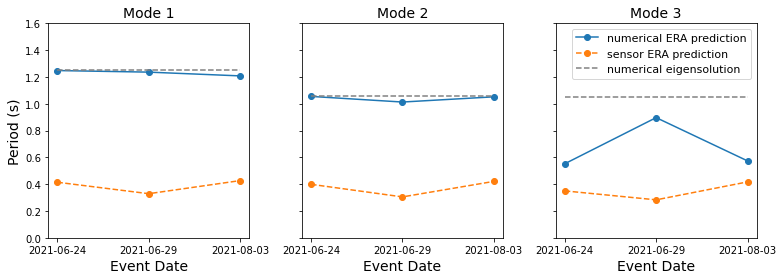

In [51]:
for m in range(3):
    # opsPds[str(m+1)] = [Periods['exp1']['ops'][m], Periods['exp2']['ops'][m], Periods['exp3']['ops'][m], Periods['exp4']['ops'][m]]
    opsPds[str(m+1)] = [Periods['exp1']['ops'][m], Periods['exp2']['ops'][m], Periods['exp4']['ops'][m]]
    # cgsPds[str(m+1)] = [Periods['exp1']['cgs'][m], Periods['exp2']['cgs'][m], Periods['exp3']['cgs'][m], Periods['exp4']['cgs'][m]]
    cgsPds[str(m+1)] = [Periods['exp1']['cgs'][m], Periods['exp2']['cgs'][m], Periods['exp4']['cgs'][m]]

fig, ax = plt.subplots(1,3, figsize=(11,4), tight_layout=True, sharey=True)
ax[0].set_ylim((0,1.6))
ax[0].set_ylabel("Period (s)", fontsize=14)
for m in range(3):
    ax[m].plot(event_dates, opsPds[str(m+1)], '-o', label='numerical ERA prediction')
    ax[m].plot(event_dates, cgsPds[str(m+1)], '--o', label='sensor ERA prediction')
    ax[m].plot(event_dates, Periods['eigen']['ops'][m]*np.ones(3), '--', color='gray', label='numerical eigensolution')
    ax[m].set_xlabel("Event Date", fontsize=14)
    ax[m].set_title(f"Mode {m+1}", fontsize=14)
ax[2].legend(fontsize=11);